In [1]:
import sys
sys.path.append("../..")

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib
import os
from surgeNN import io
import gcsfs
fs = gcsfs.GCSFileSystem() #list stores, stripp zarr from filename, load 

In [4]:
#configure the script
tg        = 'esbjerg-esb-dnk-dmi.csv'#'brest-822a-fra-uhslc.csv'#
max_timesteps_between_extremes = 3

folders = [['nstep1','nstep5','nstep9','nstep13','msl','msl_u_v','1x1','3x3'],
            ['1x1','3x3','nstep9']]
models = ['lstm','convlstm']


model_datasets={}
for m,model in enumerate(models):
    datasets=[]
    for folder in folders[m]:
        dir_name = '/home/jovyan/test_surge_models/results/nns/'+folder+'/performance/'+model+'/'

        ds =io.Output(dir_name)
        ds.open_performance_data([tg])
        ds.data = ds.data.sel(max_timesteps_between_extremes=max_timesteps_between_extremes).load()

        observed_thresholds = ds.observed_thresholds()
        ds = ds.data
        ds['observed_thresholds'] = observed_thresholds
        datasets.append(ds)

    ds = xr.concat(datasets,dim='test',coords='different')
    ds['test'] = folders[m]
    
    model_datasets[model] = ds

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


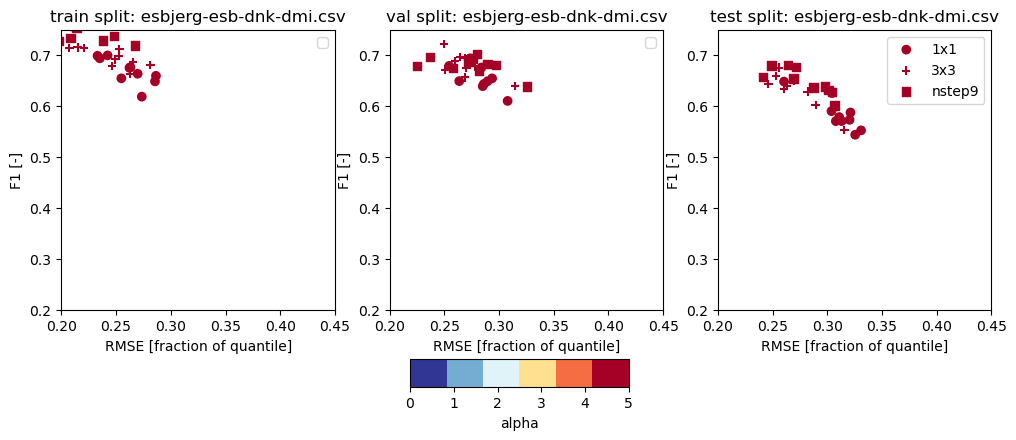

In [5]:
fig=plt.figure(figsize=(12,8))
model='convlstm'
tests = ['1x1','3x3','nstep9']
ds = model_datasets[model]
out_q = .99

split='train'

ax1 = plt.subplot(2, 3, 1)

for n,test in enumerate(tests):
    s=ax1.scatter(ds.sel(test=test).sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q)/ds.observed_thresholds.sel(tg=tg,test=test).sel(quantile=out_q).sel(split=split),
            ds.sel(test=test).sel(tg=tg).f1.sel(split=split,quantile=out_q),c=ds.sel(test=test).hyperparameters.sel(split=split,p='dl_alpha').astype('int'),cmap=plt.get_cmap('RdYlBu_r', 6),marker=['o','+','s','1'][n],vmin=0,vmax=5)

#ax1.colorbar(s)    
ax1.legend()
ax1.set_xlim([.2,.45])
ax1.set_ylim([.2,.75])
ax1.set_xlabel('RMSE [fraction of quantile]')
ax1.set_ylabel('F1 [-]')
ax1.set_title(split +' split: '+tg)


split='val'

ax1 = plt.subplot(2, 3, 2)

for n,test in enumerate(tests):
    s=ax1.scatter(ds.sel(test=test).sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q)/ds.observed_thresholds.sel(tg=tg,test=test).sel(quantile=out_q).sel(split=split),
            ds.sel(test=test).sel(tg=tg).f1.sel(split=split,quantile=out_q),c=ds.sel(test=test).hyperparameters.sel(split=split,p='dl_alpha').astype('int'),cmap=plt.get_cmap('RdYlBu_r', 6),marker=['o','+','s','1'][n],vmin=0,vmax=5)

#ax1.colorbar(s)    
ax1.legend()
ax1.set_xlim([.2,.45])
ax1.set_ylim([.2,.75])
ax1.set_xlabel('RMSE [fraction of quantile]')
ax1.set_ylabel('F1 [-]')
ax1.set_title(split +' split: '+tg)

split='test'

ax1 = plt.subplot(2, 3, 3)

for n,test in enumerate(tests):
    s=ax1.scatter(ds.sel(test=test).sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q)/ds.observed_thresholds.sel(tg=tg,test=test).sel(quantile=out_q).sel(split=split),
            ds.sel(test=test).sel(tg=tg).f1.sel(split=split,quantile=out_q),c=ds.sel(test=test).hyperparameters.sel(split=split,p='dl_alpha').astype('int'),cmap=plt.get_cmap('RdYlBu_r', 6),marker=['o','+','s','1'][n],label=test,vmin=0,vmax=5)
ax1.legend()
#ax1.colorbar(s)    
ax1.legend()
ax1.set_xlim([.2,.45])
ax1.set_ylim([.2,.75])
ax1.set_xlabel('RMSE [fraction of quantile]')
ax1.set_ylabel('F1 [-]')
ax1.set_title(split +' split: '+tg)

cax=inset_axes(ax1,width="100%", height="100%",bbox_to_anchor=(-1.1, -.25,.8,.1),bbox_transform=ax1.transAxes)
fig.colorbar(s, cax=cax,orientation='horizontal',label='alpha')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


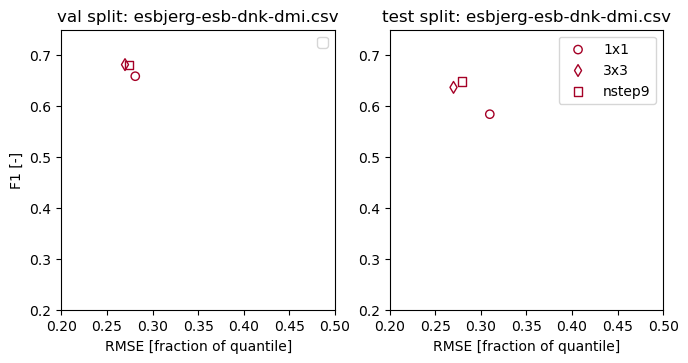

In [6]:
fig=plt.figure(figsize=(12,8))
model='convlstm'
tests = ['1x1','3x3','nstep9']
ds = model_datasets[model]
out_q = .99
split='val'

ax1 = plt.subplot(2, 3, 1)

for n,test in enumerate(tests):
    s=ax1.scatter(ds.sel(test=test).sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q).mean(dim='it')/ds.observed_thresholds.sel(tg=tg,test=test).sel(quantile=out_q).sel(split=split),
            ds.sel(test=test).sel(tg=tg).f1.sel(split=split,quantile=out_q).mean(dim='it'),facecolor='None',
                  edgecolor=plt.get_cmap('RdYlBu_r', 6)(list(ds.sel(test=test).hyperparameters.sel(split=split,p='dl_alpha').isel(it=0).sel(tg=tg).values.astype('int'))),marker=['o','d','s','H'][n])

#ax1.colorbar(s)    
ax1.legend()
ax1.set_xlim([.2,.5])
ax1.set_ylim([.2,.75])
ax1.set_xlabel('RMSE [fraction of quantile]')
ax1.set_ylabel('F1 [-]')
ax1.set_title(split +' split: '+tg)

split='test'

ax2 = plt.subplot(2, 3, 2)
for n,test in enumerate(tests):
    s=ax2.scatter(ds.sel(test=test).sel(tg=tg).rmse_extremes.sel(split=split,quantile=out_q).mean(dim='it')/ds.observed_thresholds.sel(tg=tg,test=test).sel(quantile=out_q).sel(split=split),
            ds.sel(test=test).sel(tg=tg).f1.sel(split=split,quantile=out_q).mean(dim='it'),facecolor='None',
                  edgecolor=plt.get_cmap('RdYlBu_r', 6)(list(ds.sel(test=test).hyperparameters.sel(split=split,p='dl_alpha').isel(it=0).sel(tg=tg).values.astype('int'))),marker=['o','d','s','H'][n],label=test)
#ax1.colorbar(s)    
ax2.legend()
ax2.set_xlim([.2,.5])
ax2.set_ylim([.2,.75])
ax2.set_xlabel('RMSE [fraction of quantile]')
ax2.set_title(split +' split: '+tg)
ax2.legend()

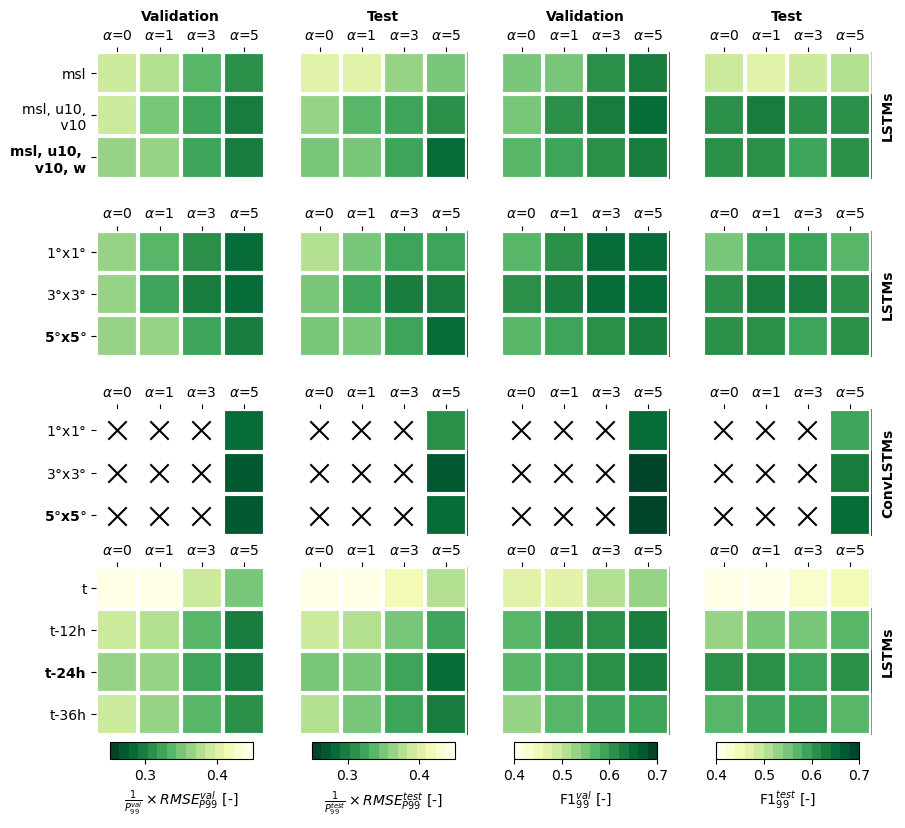

In [20]:
#plot sensitivity experiments heatmaps
store_fig=1
#list of experiments and labels per experiment:
quantile=.99

model = ['lstm','lstm','convlstm','lstm']
default_settings = [-1,-1,-1,-2]

test_dirs = [['msl','msl_u_v', 'nstep9'],
             ['1x1','3x3','nstep9'],
             ['1x1','3x3','nstep9'],
             ['nstep1','nstep5','nstep9','nstep13'],]

test_labels = [['msl','msl, u10,\n v10', 'msl, u10, \n v10, w'],
             [r'1$\degree$x1$\degree$',r'3$\degree$x3$\degree$',r'5$\degree$x5$\degree$'],
               [r'1$\degree$x1$\degree$',r'3$\degree$x3$\degree$',r'5$\degree$x5$\degree$'],
             ['t','t-12h','t-24h','t-36h'],]

tg        = 'esbjerg-esb-dnk-dmi.csv'

alphas = [0,1,3,5]
col_labels=[r'$\alpha$=0',r'$\alpha$=1',r'$\alpha$=3',r'$\alpha$=5']

fig=plt.figure(figsize=(10,9)) 
gs = fig.add_gridspec(len(test_dirs),4)
gs.update(top=.9,wspace=.2,hspace=.02)

for s,test_set in enumerate(test_dirs):
    for sp,split in enumerate(['val','test']):
        for m,metric in enumerate(['rmse_extremes','f1']):
            ds = model_datasets[model[s]]
            data = ds.sel(test=test_set,split=split,quantile=quantile).isel(tg=0)[metric].mean(dim='it')
            if model[s] =='convlstm':
                data=np.tile(data,4)
                data[:,0:3] = np.nan
            if metric=='rmse_extremes':
                data = data / ds.observed_thresholds.sel(tg=tg,test=test,split=split,quantile=out_q).values
            
            ax = plt.subplot(gs[s,sp+m*2]) 
            if metric == 'rmse_extremes':
                cmap = plt.get_cmap('YlGn_r',15)
                if split=='val':
                    cbar_label = r'$\frac{{1}}{{P_{99}^{val}}} \times RMSE_{P99}^{val}$ [-]'
                else:
                    cbar_label = r'$\frac{{1}}{{P_{99}^{test}}} \times RMSE_{P99}^{test}$ [-]'
                vmin=.25
                vmax=.45
            else:
                cmap = plt.get_cmap('YlGn',15)
                if split=='val':
                    cbar_label = r'F1$_{99}^{val}$ [-]'
                else:
                    cbar_label = r'F1$_{99}^{test}$ [-]'
                vmin=.4
                vmax=.7
                    
            im = ax.imshow(data,vmin=vmin,vmax=vmax,cmap=cmap) # Plot the heatmap
            
            if model[s]=='convlstm':
                for i in np.arange(3):
                    ax.scatter([.12+i*.25],[.16],marker='x',s=175,c=['black'],transform=ax.transAxes,zorder=10)
                    ax.scatter([.12+i*.25],[.5],marker='x',s=175,c=['black'],transform=ax.transAxes,zorder=10)
                    ax.scatter([.12+i*.25],[.84],marker='x',s=175,c=['black'],transform=ax.transAxes,zorder=10)

            if s==0:
                ax.text(.5,1.25,['Validation','Test'][sp],transform=ax.transAxes,fontweight='bold',ha='center')
            if (metric=='f1') & (split=='test'):
                ax.text(1.1,.5,model[s].upper().replace('CONV','Conv')+'s',transform=ax.transAxes,fontweight='bold',rotation=90, ha="center",va='center')   
                
            # Create colorbar
            if s==len(test_dirs)-1:
                cax=inset_axes(ax,width="100%", height="100%",bbox_to_anchor=(.12, -.1,.85,.1),bbox_transform=ax.transAxes)
                fig.colorbar(im, cax=cax,orientation='horizontal',label=cbar_label)
            
            if sp+m==0:
                ax.set_yticks(range(data.shape[0]), labels=test_labels[s])
                ax.get_yticklabels()[default_settings[s]].set_fontweight("bold")
            else:
                ax.set_yticks([])

            ax.set_xticks(range(data.shape[1]), labels=col_labels,
                          rotation=0, ha="center")
            
            # Let the horizontal axes labeling appear on top.
            ax.tick_params(top=True, bottom=False,
                           labeltop=True, labelbottom=False)

            # Turn spines off and create white grid.
            ax.spines[:].set_visible(False)
        
            ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
            ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
            ax.set_facecolor('white')
            ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
            ax.tick_params(which="minor", bottom=False, left=False)
            
if store_fig:
    fig.savefig('/home/jovyan/test_surge_models/nhess_figures/sfig1_sensitivity_esbjerg.jpg',format='jpg',dpi=300,bbox_inches='tight') #store figure